In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
data = pd.read_csv("~/.pomodoro",
                     parse_dates=["start"])

In [3]:
data.head()
data = (data.loc[data["work"]=="work"])

In [4]:
data["day"] = data["start"]
data["day"] = data["day"].apply(lambda x:x.date())

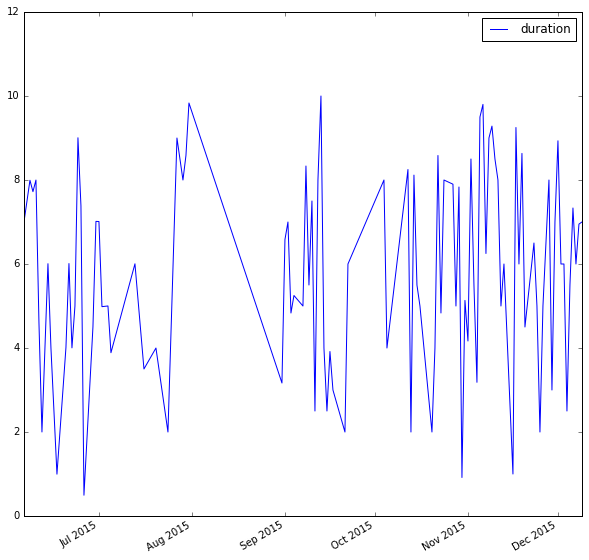

In [5]:
duration_per_day = data.groupby("day").sum() / 60.
duration_per_day.index = duration_per_day.index.to_datetime()
duration_per_day.plot(figsize=(10, 10), x_compat=True)
plt.show()

In [6]:
d = pd.date_range(duration_per_day.index[0], duration_per_day.index[-1])
e = pd.DataFrame(index=d)
#duration_per_day_full = pd.merge(e, duration_per_day, how='left', left_index=True, right_index=True)
duration_per_day_full = pd.merge(e, duration_per_day, how='left', left_index=True, right_index=True)
duration_per_day_full["duration"] = duration_per_day_full["duration"].fillna(0)
duration_per_day_full.to_csv("pomodoro.csv")

duration    19.951263
dtype: float64
            duration
2015-06-06  6.995278
2015-06-07  0.000000
2015-06-08  7.993889
2015-06-09  7.722778
2015-06-10  7.999444
2015-06-11  4.607222
2015-06-12  2.000833
2015-06-13  0.000000
2015-06-14  6.007778
2015-06-15  3.997778
2015-06-16  0.000000
2015-06-17  0.996389
2015-06-18  0.000000
2015-06-19  3.005278
2015-06-20  4.013333
2015-06-21  6.011389
2015-06-22  4.003611
2015-06-23  5.000833
2015-06-24  9.006111
2015-06-25  7.384444
2015-06-26  0.495278
2015-06-27  0.000000
2015-06-28  0.000000
2015-06-29  4.505278
2015-06-30  7.015000
2015-07-01  7.011389
2015-07-02  4.984722
2015-07-03  0.000000
2015-07-04  5.001111
2015-07-05  3.888056
...              ...
2015-11-10  8.500356
2015-11-11  8.000361
2015-11-12  5.000481
2015-11-13  6.000611
2015-11-14  0.000000
2015-11-15  0.000000
2015-11-16  1.000060
2015-11-17  9.250354
2015-11-18  6.000317
2015-11-19  8.633586
2015-11-20  4.500203
2015-11-21  0.000000
2015-11-22  0.000000
2015-11-23  6.5003

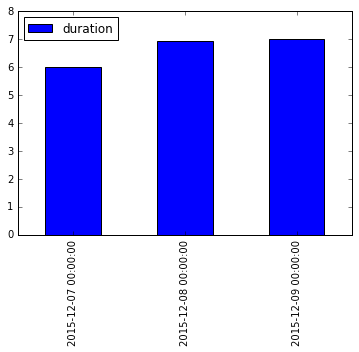

In [7]:
last_monday = datetime.today() - timedelta(days=datetime.today().weekday()+1)
last_monday -= timedelta(days=7) * 0
next_sunday = last_monday + timedelta(days=7)
f1 = duration_per_day_full.index>=last_monday
f2 = duration_per_day_full.index<=next_sunday
duration_per_day_full[f1 & f2].plot(kind="bar")
print(duration_per_day_full[f1 & f2].sum())
print(duration_per_day_full)

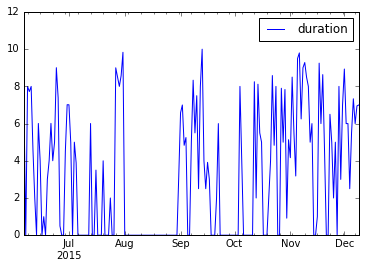

In [8]:
duration_per_day_full.plot()

                 duration
day dayname              
0   Monday     104.208315
1   Tuesday    107.692739
2   Wednesday   98.732920
3   Thursday   100.447453
4   Friday      58.638060
5   Saturday    56.894366
6   Sunday      57.408733
duration    584.022585
dtype: float64


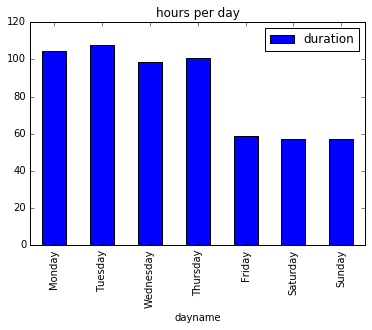

In [9]:
import calendar
from datetime import timedelta
D = data.copy()
weekmap = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
D["day"] = D["start"].map(lambda x:x.weekday())
D["dayname"] = D["start"].map(lambda x:weekmap[x.weekday()])

sum_up = False
previous_weeks = -1# if -1 consider previous_n_weeks, if >= 0 consider current week for 0, then previous week etc

last_monday = datetime.today() - timedelta(days=datetime.today().weekday())
last_monday -= previous_weeks * timedelta(days=7)
next_sunday = last_monday + timedelta(days=6)

if previous_weeks >= 0:
    D = D[D.start>=last_monday]

if sum_up is False:
    D = D[D.start<=next_sunday]

D = D.groupby(by=("day", "dayname"))
D = D.sum()/60.
print(D)
print(D.sum())
D = D.reset_index().plot(kind="bar", title="hours per day", 
                                      x="dayname", y="duration")


In [10]:
per_day = (data.groupby(by="day")).sum()/60.
print(per_day.mean())
print(per_day.std())

duration    5.770224
dtype: float64
duration    2.391654
dtype: float64


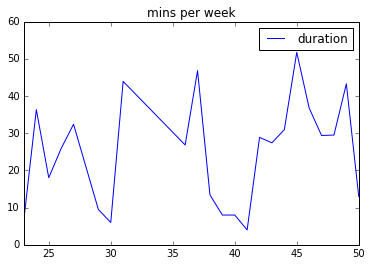

In [11]:
import calendar
mapping = lambda x: x.isocalendar()[1]
(data.set_index("day").groupby(mapping).sum()/60).plot(title="mins per week")

In [11]:
print("per day")
(data.set_index("day").groupby(mapping).sum().mean())/24

per day


NameError: name 'mapping' is not defined